# Deel I. Machine learning

## Hoofdstuk 2. Generieke neuronen

1. [Inleiding](#Inleiding)
2. [Activatie- en loss-functies](#Activatie_en_loss_functies)
3. [Lineaire regressie](#Lineaire_regressie)
4. [Logistische regressie](#Logistische_regressie)
5. [Support Vector Machines](#Support_Vector_Machines)

### <a id='Inleiding'>Inleiding</a>

Dit is het Jupyter Notebook behorende bij hoofdstuk 2 van het vak *Advanced Datamining* (BFVH4DMN2). Op BlackBoard tref je eveneens een module `data.py` aan die diverse functies bevat die helpen bij het genereren en het visualiseren van de gebruikte datasets. Kopieer het bestand `model.py` van het vorige hoofdstuk en sla deze bestanden gezamenlijk op in één werkmap. Open je `model` module in een code-editor naar keuze om hiermee verder te werken.

Laten we weer beginnen om deze functies te importeren, samen met wat initialisatie-code en enkele onderdelen van de modules `sklearn` en `pandas`. Plaats de cursor in de cel hieronder en druk op Ctrl+Enter (of Shift+Enter om meteen naar de volgende cel te gaan).

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from sys import version
print(f'Using python version {version.split(" ")[0]}')

from pandas import DataFrame, __version__
print(f'Using pandas version {__version__}')

from sklearn import linear_model, svm, __version__
print(f'Using sklearn version {__version__}')

import model, data

Using python version 3.11.5
Using pandas version 2.0.3
Using sklearn version 1.3.0


### <a id='Activatie_en_loss_functies'>Activatie- en loss-functies</a>

Lineaire regressie maakt gebruik van de identiteitsfunctie als activatiefunctie. Van het perceptron kennen we reeds de signum-functie. Deze functies hebben één parameter en retourneren één getalwaarde. Het zijn daarmee relatief elementaire functies.

De identiteitsfunctie kan bijvoorbeeld eenvoudigweg worden geïmplementeerd als:

```python
def linear(a):
    return a
```

Voeg naast deze functie ook een `sign()` functie toe aan je `model` module met de signum functie. Voel je vrij om ook enkele andere activatiefuncties te implementeren (zie bv. de tabel op [Wikipedia](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions) voor een uitgebreid overzicht).
 
Met de code hieronder kun je je activatie-functies weergeven met behulp van de `data.graph()` functie. Controleer dat alle door jou geïmplementeerde functies de juiste verwachte vorm hebben.

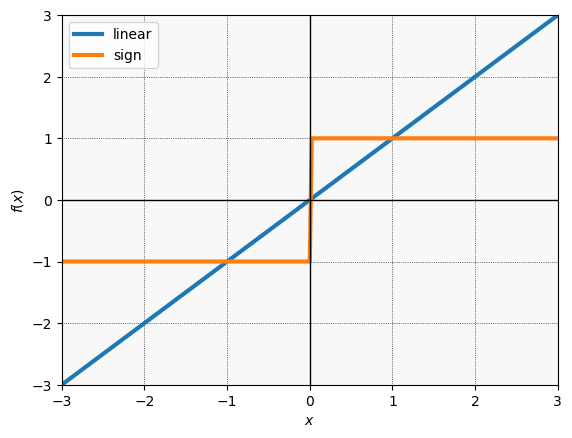

In [3]:
data.graph([model.linear, model.sign])

Hetzelfde kunnen we doen met de loss-functies. We zijn één voorname loss-functie tegengekomen, de kwadratische loss-functie $\mathcal{L}\left(\hat{y};y\right)=\left(\hat{y}-y\right)^{2}$. Implementeer deze in de vorm van een functie `mean_squared_error(yhat, y)`. Voeg ook een variant `mean_absolute_error(yhat, y)` toe die de absolute waarde van de afwijking neemt volgens $\mathcal{L}\left(\hat{y};y\right)=\left|\hat{y}-y\right|$.

Geef met de code hieronder wederom de functie weer. Merk op dat de loss-functie twee parameters heeft: $\hat{y}$ en $y$. Met `data.graph()` kun je de afhankelijkheid van de eerste parameter tonen; de tweede parameter kun je een vaste waarde meegeven. Het resultaat is dus een loss-functie die aangeeft hoe groot de loss van een instance met voorspelling $\hat{y}$ is, *gegeven een bepaalde gewenste uitkomst $y$*. Ga na dat uit de grafiek blijkt dat de kwadratische loss-functie gelijk is aan nul als $\hat{y}=y$. Geldt dit ook voor de absolute loss-functie?

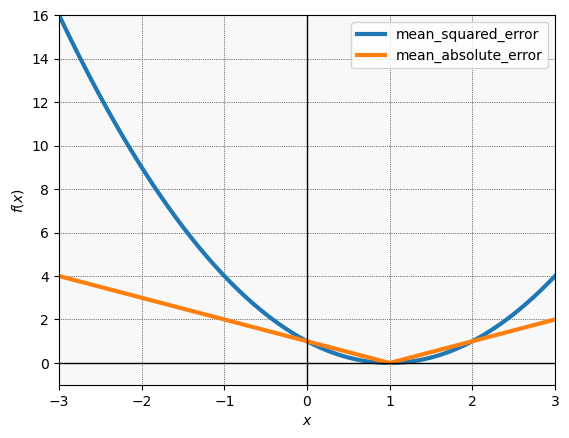

In [4]:
y = +1.0
data.graph([model.mean_squared_error, model.mean_absolute_error], y)

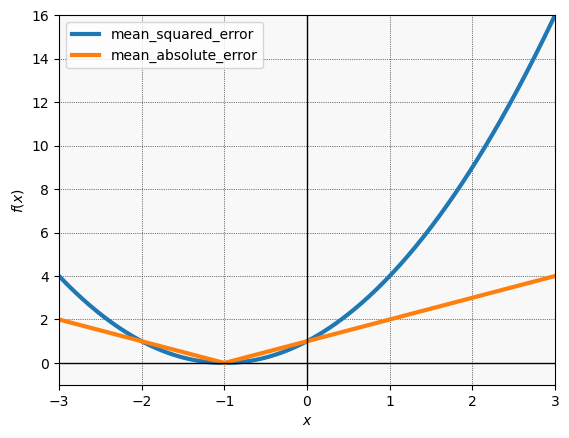

In [5]:
y = -1.0
data.graph([model.mean_squared_error, model.mean_absolute_error], y)

Tenslotte is het van belang dat we kunnen werken met de afgeleiden van diverse functies. Afgeleiden zijn analytisch te bepalen door te differentiëren, maar voor het gemak zullen we hier gebruik maken van numerieke afgeleiden die je bijvoorbeeld kunt bepalen met de formule:

$$
\frac{\partial y}{\partial x}\approx\frac{f\left(x+\Delta x\right)-f\left(x-\Delta x\right)}{2\Delta x}
$$

De waarde van $\Delta x$ moet voldoende klein genomen worden om de benadering kloppend te laten zijn ter plekke van de gevraagde $x$. Aan de andere kant moet $\Delta x$ ook voldoende groot genomen worden opdat afrondfouten niet de overhand krijgen omdat een computer getallen nou eenmaal met een beperkt aantal cijfers achter de komma representeert.

Implementeer de bovenstaande formule in de vorm van een functie `derivative()`. Deze dient de afgeleide te bepalen van een zekere functie `function()` die meegegeven wordt als argument. Een optioneel argument `delta` geeft de stapgrootte $\Delta x$ aan; kies hiervoor een geschikte (kleine, maar niet te kleine) default waarde. Als return-value dient `derivative()` een functie te geven die de afgeleide van de gespecificeerde functie bevat. Dit wordt bereikt door een inner functie `wrapper_derivative()` te nesten in de body van de `derivative()` functie zelf en deze te retourneren. Dit komt er ongeveer als volgt uit te zien:

```python
def derivative(function, delta=...):

    def wrapper_derivative(x):
        return ...   # Hier kun je o.a. "function(x)" aanroepen om de afgeleide mee te berekenen
        
	wrapper_derivative.__name__ = function.__name__ + '’'
	wrapper_derivative.__qualname__ = function.__qualname__ + '’'
    return wrapper_derivative
```

<div class="alert alert-info">

**Opmerking:**

De regels met `__name__` en `__qualname__` dienen slechts om de geretourneerde functie een andere naam te geven, om te voorkomen dat de afgeleide van elke willekeurige functie steeds maar `wrapper_derivative` zou blijven heten.

</div>

Controleer dat de onderstaande code correct zowel de functie als diens afgeleide weergeeft. Probeer ook jouw andere activatie-functies uit.

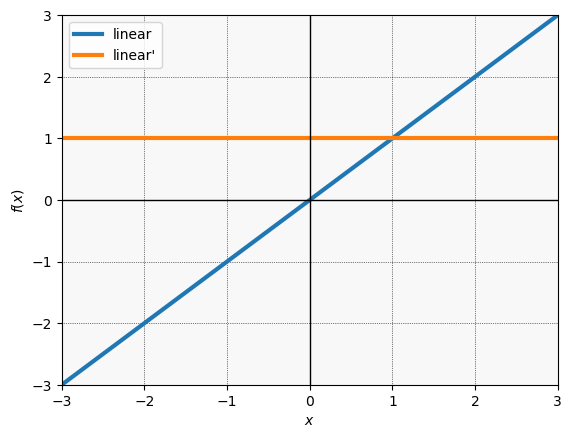

In [7]:
my_activation = model.linear
my_gradient = model.derivative(my_activation)
data.graph([my_activation, my_gradient])

Omdat sommige functies ook nog andere parameters verwachten dient de resulterende afgeleide functie dergelijke extra parameters te kunnen verwerken. Zo dient bijvoorbeeld de loss-functie naast het argument `yhat` ook een extra argument `y` te ontvangen. Dat betekent dat ook de afgeleide functie naast het argument `yhat` die extra argumenten moet meekrijgen. Gebruik hiervoor de `*args` notatie.

```python
    def wrapper_derivative(x, *args):
        return ...   # Hier kun je o.a. "function(x, *args)" aanroepen om de afgeleide mee te berekenen
```

Verifieer dat de onderstaande code correct zowel de functie als diens afgeleide weergeeft. De loss-functie dient in dit geval dus weer te geven hoe groot de loss is voor een instance met een gegeven uitkomst $y$. Ga na dat de kwadratische loss-functie een minimum heeft als $\hat{y}=y$, wat betekent dat de afgeleide daar door nul gaat. Geldt dit ook voor de absolute loss-functie?

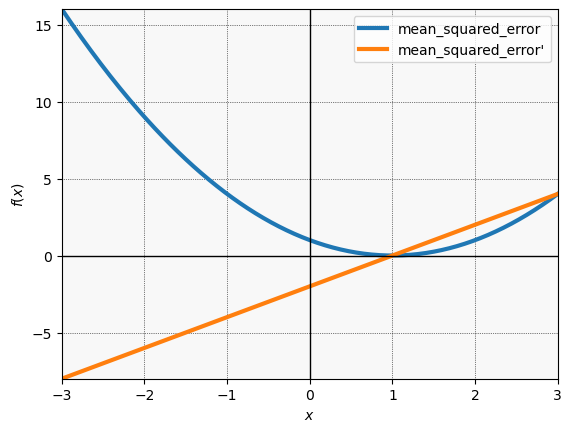

In [12]:
my_loss = model.mean_squared_error
my_gradient = model.derivative(my_loss)
y = +1.0
data.graph([my_loss, my_gradient], y)

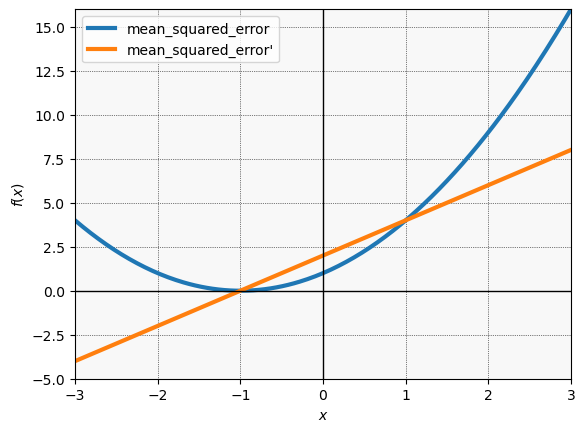

In [13]:
y = -1.0
data.graph([my_loss, my_gradient], y)

<div class="alert alert-success">

**Gefeliciteerd!**
    
Je hebt nu zelf een functie geïmplementeerd die de numerieke afgeleide van elke willekeurige functie kan berekenen.

</div>

### <a id='Lineaire_regressie'>Lineaire regressie</a>

We gaan de implementaties van het perceptron en lineaire regressie uit het vorige hoofdstuk generaliseren. Dit algemene model zal in latere hoofdstukken gebruikt worden als uitgangspunt voor het maken van neurale netwerken. Voeg aan je bestaande module één nieuwe class genaamd `Neuron()` toe met de volgende inhoud:

```python
class Neuron():

    def __repr__(self):
		text = f'Neuron(dim={self.dim}, activation={self.activation.__name__}, loss={self.loss.__name__})'
		return text
```

Deze class krijgt tijdens diens initialisatie een stel parameters mee die bepalen wat de te gebruiken activatie- en loss-functies zullen zijn. Door hier geschikte waarden voor mee te geven kan met één en hetzelfde model zowel classificatie als regressie worden uitgevoerd!

Laten we echter eerst weer een kijkje nemen naar de data. De functie `data.linear()` produceert wederom een verzameling willekeurige instances met bijbehorende uitkomsten. Voorlopig kiezen we voor regressie met numerieke uitkomsten middels de parameter `outcome='numeric'`.

In [14]:
xs, ys = data.linear(outcome='numeric', noise=1.0)
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys).head()

,x1,x2,y
0,-0.196929,-2.898349,1.276279
1,-4.527624,0.126976,4.961780
2,0.664231,2.449341,1.269983
3,1.890646,0.241708,1.273041
4,2.194566,0.430672,-0.121729


Zoals je ziet maken we nu ook gebruik van een extra parameter genaamd `noise`. Als deze groter dan nul wordt gekozen dan zullen de datapunten willekeurig enigszins worden verplaatst, waardoor ze niet langer lineair separabel hoeven te zijn of niet meer exact een lineair model zullen volgen.

In [ ]:
data.scatter(xs, ys)

Experimenteer eens met de `noise` parameter om een idee te krijgen van diens effect. Vergelijk bijvoorbeeld de instelling `noise=0.0` met `noise=10.0`; wat valt je daarbij op aan de resulterende datasets?
 
De initialisatie-methode `__init__()` dient als eerste te worden toegevoegd aan onze `Neuron()` class. We onderscheiden voor ons generieke model wederom de bias $b$ en gewichten $\boldsymbol{w}$. Daarnaast zullen zoals gezegd de activatie- en loss-functies moeten worden toegekend aan instance-variabelen; geef deze als default waarden respectievelijk de functies `linear()` en `mean_squared_error()`. Bekijk de methode `__repr__()` om te zien welke variabelen in elk geval gedefinieerd dienen te zijn.

Als het goed is kun je hierna zonder foutmeldingen een nieuw object instantiëren en weergeven. Hieronder geeft de parameter `2` aan dat de dataset twee numerieke attributen omvat. Controleer dat de bias en gewichten juist zijn geinitialiseerd.

In [ ]:
my_neuron = model.Neuron(2)
print(my_neuron)
print(f'- bias = {my_neuron.bias}')
print(f'- weights = {my_neuron.weights}')

Probeer ook uit of het neuron met een andere gewenste activatie- of loss-functie kan worden aangemaakt.

In [ ]:
my_neuron = model.Neuron(dim=2, activation=model.sign, loss=model.mean_absolute_error)
print(my_neuron)
print(f'- bias = {my_neuron.bias}')
print(f'- weights = {my_neuron.weights}')

De volgende stap is om de code te schrijven die voor een gegeven instance een voorspelling kan doen van de juiste uitkomst op grond van het model van het neuron:

$$
\begin{equation*}
\hat{y}=\varphi\left(b+\sum_{i}w_{i}\cdot x_{i}\right)
\end{equation*}
$$

waarin $\varphi$ de activatie-functie aangeeft. De methode `predict(self, xs)` heeft een parameter die de attributen van een lijst instances ontvangt en dient waarden te retourneren die overeenkomen met het resultaat van de bovenstaande formule. Dit is zeer vergelijkbaar met dezelfde functie van het perceptron uit het vorige hoofdstuk.

Als je deze code correct hebt geïmplementeerd zou je hieronder de voorspellingen in tabelvorm moeten zien. Het model doet nog geen zinvolle voorspellingen, dus de waarden voor $\hat{y}$ en $y$ komen nog niet overeen.

In [ ]:
my_neuron = model.Neuron(dim=2)
yhats = my_neuron.predict(xs)
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys, ŷ=yhats).head()

Vervolgens gaan we het neuron trainen op grond van een verzameling instances met gegeven attributen en uitkomsten. Gebruik hiervoor telkens de volgende update-regel:

$$
\left\{ \begin{align}
b &\leftarrow b-\alpha\cdot\frac{\partial l}{\partial\hat{y}}\cdot\frac{\partial\hat{y}}{\partial a}
\\
w_{i} &\leftarrow w_{i}-\alpha\cdot\frac{\partial l}{\partial\hat{y}}\cdot\frac{\partial\hat{y}}{\partial a}\cdot x_{i}
\end{align}\right.
$$

De verschillende afgeleiden kun je bepalen met de eerder gedefinieerde `derivative()` functie:

- $\frac{\partial l}{\partial\hat{y}} = \frac{\partial \mathcal{L}\left(\hat{y};y\right)}{\partial\hat{y}} = \mathcal{L}'$ bevat de afgeleide van de loss-functie $\mathcal{L}$;

- $\frac{\partial\hat{y}}{\partial a} = \frac{\partial\varphi\left(a\right)}{\partial a} = \varphi'$ bevat de afgeleide van de activatie-functie $\varphi$.

De methode `partial_fit(self, xs, ys, *, alpha=...)` heeft naast de attributen en de uitkomsten ook weer de learning rate als parameter. Vergelijk dit met je lineaire regressiemodel van het vorige hoofdstuk. Kies weer een redelijke default waarde voor $\alpha$.

Na het trainen met vijf instances zou er al een zwakke gradiënt in de achtergrond zichtbaar kunnen worden. De diagonale stippellijn geeft hieronder aan waar de voorspelling $\hat{y}=0$; deze scheidt dus de instances met een voorspelde positieve uitkomst van die met een voorspelde negatieve uitkomst. Op dit moment hoeven de voorspellingen nog niet goed met de data overeen te komen.

In [ ]:
my_neuron = model.Neuron(dim=2)
my_neuron.partial_fit(xs[:5], ys[:5])
data.scatter(xs, ys, model=my_neuron)
print(my_neuron)
print(f'- bias = {my_neuron.bias}')
print(f'- weights = {my_neuron.weights}')

De laatste methode die geïmplementeerd dient te worden is weer `fit(self, xs, ys, *, alpha=..., epochs=...)`. Deze dient de hele dataset te gebruiken om het neuron te trainen gedurende een gegeven aantal epochs. Vermoedelijk kun je deze methode nagenoeg letterlijk overnemen van je eerdere `LinearRegression()` class. Daar werd ook de rol van de extra keyword-argumenten beschreven.

Draai de code hieronder. Slaagt je model erin om te convergeren naar een uitkomst die de echte getalwaarden van de instances ogenschijnlijk goed voorspelt?

In [ ]:
my_neuron = model.Neuron(dim=2)
my_neuron.fit(xs, ys)
data.scatter(xs, ys, model=my_neuron)
print(my_neuron)
print(f'- bias = {my_neuron.bias}')
print(f'- weights = {my_neuron.weights}')

Verifieer hieronder dat de voorspellingen enigszins overeen komen met de gewenste waarden. Omdat de data nu ruis bevatten is de overeenkomst niet exact, maar voor instances waarvoor de uitkomsten ver van nul vandaan liggen zou het teken van  $y$ en $\hat{y}$ toch overeen moeten komen.

In [ ]:
yhats = my_neuron.predict(xs)
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys, ŷ=yhats).head()

<div class="alert alert-success">

**Gefeliciteerd!**

Je hebt nu een algoritme geïmplementeerd dat modellen met willekeurige activatie- en loss-functies kan oplossen.

</div>

Ter vergelijking passen we hieronder ook weer het lineaire regressiemodel uit de machine-learning module [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) op deze dataset met ruis toe.

Ziet de oplossing er hetzelfde uit als voor je eigen model? Zijn de waarden van de bias en de gewichten van vergelijkbare grootten?

In [ ]:
skl_linearregression = linear_model.LinearRegression()
skl_linearregression.fit(xs, ys)
data.scatter(xs, ys, model=skl_linearregression)
print(skl_linearregression)
print(f'- bias = {skl_linearregression.intercept_}')
print(f'- weights = {skl_linearregression.coef_}')

### <a id='Logistische_regressie'>Logistische regressie</a>

Als het goed is kan je met dit model ook classificatie uitvoeren in plaats van regressie. We hoeven daartoe alleen nog maar de activatie-functie te veranderen, en "klaar is Kees (m/v/x)".

Ogenschijnlijk kun je het perceptron implementeren door de signum-functie als activatiefunctie te kiezen, maar helaas heeft deze geen geschikte afgeleide (de helling is altijd ofwel nul, ofwel oneindig groot). Dit kan opgelost worden door een afgevlakte sigmoïde functie te nemen. Een voorbeeld hiervan is de tanh-functie. Deze lost zowel het probleem van helling nul als van helling oneindig op, aangezien deze overal een positieve maar eindige helling heeft.

<div class="alert alert-info">

**Opmerking:**

Eigenlijk maakt logistische regressie ook nog gebruik van een andere loss-functie, de *cross-entropy*. We maken hier in latere hoofdstukken kennis mee, maar voorlopig gebruiken we gewoon de kwadratische loss-functie.

</div>

Implementeer de `tanh()` functie en plot deze functie hieronder samen met zijn afgeleide. Python's `math` module kan hier behulpzaam zijn. Het resultaat van het gebruik van een dergelijke activatie-functie heet logistische regressie.

In [ ]:
my_activation = model.tanh
my_gradient = model.derivative(my_activation)
data.graph([my_activation, my_gradient])

Hieronder wordt een dataset met nominale klasselabels gefit met deze activatiefunctie. De overgang tussen de klassen is door de afgevlakte tanh-functie niet zo scherp als bij het perceptron, maar voor data die niet lineair separabel zijn is dit juist zinvol omdat hiermee aangegeven kan worden dat de classificatie nabij de grenslijn enigszins onzeker is.

Kijk of de code correct functioneert. Is de gevonden scheidingslijn voor zover mogelijk in staat om de instances van de beide klassen te onderscheiden?

In [ ]:
xs, ys = data.linear(outcome='nominal', noise=1.0)
my_neuron = model.Neuron(dim=2, activation=model.tanh)
my_neuron.fit(xs, ys)
data.scatter(xs, ys, model=my_neuron)
print(my_neuron)
print(f'- bias = {my_neuron.bias}')
print(f'- weights = {my_neuron.weights}')

In tabelvorm ziet het er als volgt uit. De voorspelde $\hat{y}$ hebben niet de waarden -1 en +1, maar iets ertussenin afhankelijk van hoe (on)zeker het model is over de classificatie.

In [ ]:
yhats = my_neuron.predict(xs)
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys, ŷ=yhats).head()

Ook dit resultaat vergelijken we hieronder weer met het logistische regressiemodel uit de machine-learning module [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Ziet de oplossing er enigszins hetzelfde uit als voor je eigen model?

In [ ]:
skl_logisticregression = linear_model.LogisticRegression()
skl_logisticregression.fit(xs, ys)
data.scatter(xs, ys, model=skl_logisticregression)
print(skl_logisticregression)
print(f'- bias = {skl_logisticregression.intercept_[0]}')
print(f'- weights = {skl_logisticregression.coef_[0]}')

### <a id='Support_Vector_Machines'>Support Vector Machines</a>

Om de kracht van onze ontwikkelde `Neuron()` class te demonstreren sluiten we af met een algoritme dat we kunnen benaderen door niet een andere activatie-functie maar een andere loss-functie te kiezen. Een lineaire Support Vector Machine (SVM) kan worden geformuleerd in termen van een zogenaamde hinge loss-functie $\mathcal{L}\left(\hat{y};y\right)=\max\left(1 - \hat{y} \cdot y, 0 \right)$. Voor de activatie-functie wordt nu de identiteitsfunctie genomen, zoals bij lineaire regressie.

<div class="alert alert-info">

**Opmerking:**

Net als logistische regressie zit een SVM eigenlijk iets ingewikkelder in elkaar dan we hier pretenderen. Deze maakt namelijk tevens gebruik van *regularisatie*. Ook daar komen we in een later hoofdstuk nog op terug.

</div>

Voeg de hierboven genoemde functie `hinge()` aan je model toe en plot deze hieronder.

In [ ]:
my_loss = model.hinge
my_gradient = model.derivative(my_loss)
y = +1.0
data.graph([my_loss, my_gradient], y)

In [ ]:
y = -1.0
data.graph([my_loss, my_gradient], y)

We zullen deze functie niet uitgebreid bespreken, maar te zien is wel dat de hinge-functie de instances die verkeerd geclassificeerd worden een toenemende cost toekent naarmate ze verder aan de verkeerde kant van de scheidingsmarge liggen. Dat wil zeggen, instances met $y=+1$ worden toenemend bestraft als $\hat{y}$ (langs de $x$-as in de grafiek) negatief is en instances met $y=-1$ worden toenemend bestraft als $\hat{y}$ positief is. Als instances aan de goede kant liggen wordt er begrijpelijkerwijs een loss gelijk aan nul toegekend. In een overgangsgebied $-1 < \hat{y} < +1$ krijgen álle instances een kleine penalty.

Hoe dan ook, draai de onderstaande code om de eerdere data te classificeren. Geeft je SVM ook met deze activatie- en loss-functies een op het oog redelijke scheidingslijn aan?

In [ ]:
my_neuron = model.Neuron(dim=2, loss=model.hinge)
my_neuron.fit(xs, ys)
data.scatter(xs, ys, model=my_neuron)
print(my_neuron)
print(f'- bias = {my_neuron.bias}')
print(f'- weights = {my_neuron.weights}')

Voor de volledigheid kijken we ook hier naar de bijbehorende getalwaarden. Omdat de SVM geen sigmoïde activatiefunctie bevat die de uitkomsten beperkt tot een bereik van -1 tot +1, duiden in dit geval positieve getallen $\hat{y} > 0$ op een klasselabel +1 en negatieve getallen $\hat{y} < 0$ op een klasselabel -1. Het teken van $\hat{y}$ zou dus idealiter moeten overeenkomen met dat van $y$.

In [ ]:
yhats = my_neuron.predict(xs)
DataFrame(xs, columns=['x1', 'x2']).assign(y=ys, ŷ=yhats).head()

Ook dit resultaat vergelijken we hieronder weer met een SVM uit de machine-learning module [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Ziet de oplossing er vergelijkbaar uit als voor je eigen model?

In [ ]:
skl_svm = svm.SVC(kernel='linear')
skl_svm.fit(xs, ys)
data.scatter(xs, ys, model=skl_svm)
print(skl_svm)
print(f'- bias = {skl_svm.intercept_[0]}')
print(f'- weights = {skl_svm.coef_[0]}')

<div class="alert alert-success">
    
**Gefeliciteerd!**

Je hebt nu zelf een uitermate flexibel, multifunctioneel algoritme ontwikkeld dat een perceptron, lineaire regressie, logistische regressie, SVMs (en nog veel meer machine-learning algoritmen) kan uitvoeren.

</div>

***

<small>&copy; 2024, Dave R.M. Langers, [d.r.m.langers@pl.hanze.nl](mailto:d.r.m.langers@pl.hanze.nl)</small>